In [1]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import pickle as pkl
import numpy as np

In [5]:
ls -li

total 39072
42085114 -rw-r--r-- 1 fernando fernando 18694275 Apr 17 14:55 'analysis_NonRhythmic (copy).ipynb'
40719476 -rw-r--r-- 1 fernando fernando 21225531 Apr 21 22:11  analysis_NonRhythmic.ipynb
42095210 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:06  v7_batch10/
42095227 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:06  v7_batch11/
42095235 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:05  v7_batch12/
42095229 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:06  v7_batch13/
42095236 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:05  v7_batch14/
42094568 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:06  v7_batch15/
42095114 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:05  v7_batch16/
42095222 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:06  v7_batch17/
42095234 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:05  v7_batch18/
42095139 drwxr-xr-x 3 fernando fernando     4096 Apr 22 12:05  v7_batch19/
42095225 drwxr-xr-x 3 fernando fernando     4096 A

In [ ]:
FR_TC = []
vl = []

for ib in range(20):

    filename = 'v7_batch'+str(3+ib)  + '/' +'v7_batch'+str(3+ib) + '_0_0_data.pkl'

    sim.load(filename, instantiate=True, instantiateConns = False, instantiateStims = False, instantiateRxD = False, createNEURONObj = False)


    timeRange = [8000,12000]  # 'VPM_TC','ss_RTN_m', 
    binSize = 10
    sim.analysis.plotSpikeHist(include=[['VPM_sTC', 'VPM_TC']], binSize=binSize, figSize=(18, 6.0), fontSize = 12, legend=False, showFig= False,
                                        timeRange = timeRange, graphType = 'bar', measure = 'rate', linewidth=5, dpi=300, saveData=False, saveFig=False);

    SpikeHist = sim.analysis.prepareSpikeHist(include=[['VPM_sTC', 'VPM_TC']], timeRange = timeRange)
    aa, bb, = np.histogram(SpikeHist['spkTimes'],bins=range(timeRange[0],timeRange[1]+1,binSize))
    timefactor = binSize*1644/(1000)
    plt.plot(bb[1:]-binSize/2, aa/timefactor, 'c--')
    plt.show()
    FR_TC.append(aa/timefactor)

    for val in sim.cfg.IClamp[2:]:
        vl.append(val['start'])
    # sim.analysis.plotRaster(**{'include': ['VPM_TC','ss_RTN_m','VPM_sTC'], 'saveFig': False, 'showFig': False, 'popRates': True,'orderInverse': True, 
    #                         'timeRange': timeRange, 'figSize': (8,4), 'fontSize':4, 'lw': 1, 'markerSize':1, 'marker': 'o', 'dpi': 200})
    
    # for pop in ['VPM_sTC', 'VPM_TC','ss_RTN_m']:
    #     sim.analysis.plotTraces(include= [pop], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-90,65], subtitles= True, axis=True, scaleBarLoc=1, 
    #                         figSize=(12, 4), fontSize=8, showFig=False, saveFig=False);

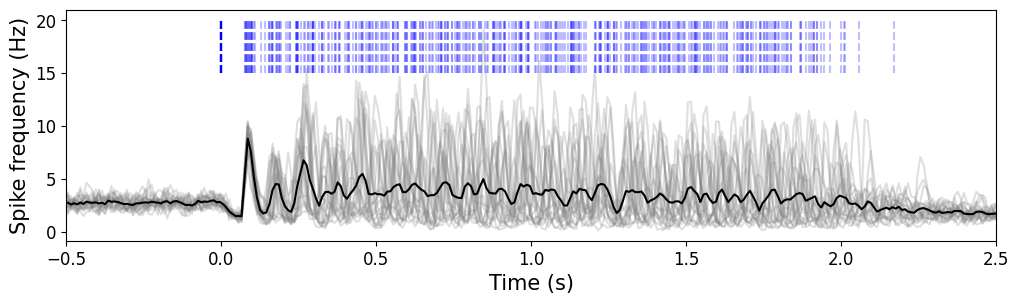

In [8]:
plt.figure(figsize=(12,3))
for i in range(20):
    plt.plot((bb[1:]-9000-binSize/2)/1000, FR_TC[i],'gray', alpha =0.25)
plt.plot((bb[1:]-9000-binSize/2)/1000, np.mean(FR_TC, axis=0),'k')
plt.ylabel('Spike frequency (Hz)', size= 15)
plt.xlabel('Time (s)', size= 15)
plt.yticks(size= 12)
plt.xlim(-0.5,2.5)
plt.vlines((np.array(vl)-9000)/1000, ymin=15,ymax = 20, color='blue', linestyles='dashed', alpha =0.25)
# plt.plot([2.0,2.0], [0,20],'--k')
plt.xticks(size= 12);

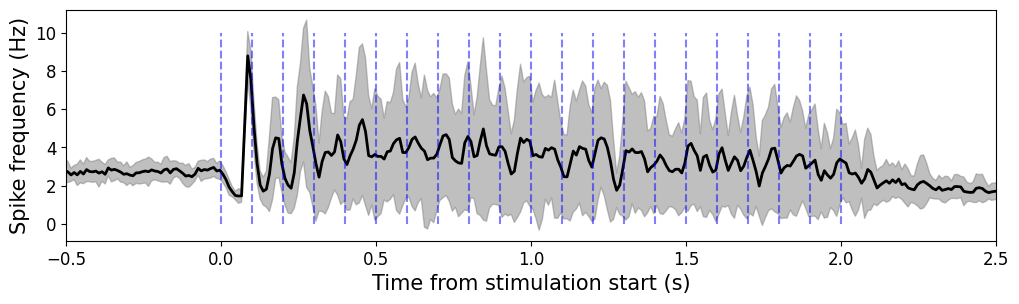

In [22]:
mean = np.mean(FR_TC, axis=0) # Calculate mean across series (axis 0)
std_dev = np.std(FR_TC, axis=0) # Calculate standard deviation across series (axis 0)
x = (bb[1:]-9000-binSize/2)/1000

plt.figure(figsize=(12,3))

# Plot the mean line
plt.plot(x, mean, label='Mean', color='black', linewidth=2)
plt.fill_between(x, mean - std_dev, mean + std_dev, color='gray', alpha=0.5, label='Mean ± 1 Std Dev')

plt.ylabel('Spike frequency (Hz)', size= 15)
plt.xlabel('Time from stimulation start (s)', size= 15)
plt.yticks(size= 12)
plt.xlim(-0.5,2.5)
# plt.vlines((np.array(vl)-9000)/1000, ymin=10,ymax = 15, color='blue', linestyles='dashed', alpha =0.25)
plt.vlines(np.linspace(0,2.0,21), ymin=0,ymax = 10, color='blue',linestyles='dashed', alpha =0.5)
# plt.plot([2.0,2.0], [0,20],'--k')
plt.xticks(size= 12);


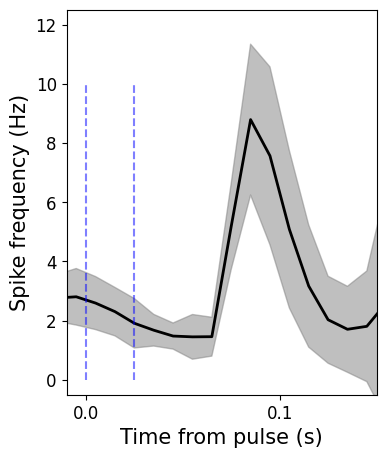

In [36]:
mean = np.mean(FR_TC, axis=0) # Calculate mean across series (axis 0)
std_dev = np.std(FR_TC, axis=0) # Calculate standard deviation across series (axis 0)
x = (bb[1:]-9000-binSize/2)/1000

plt.figure(figsize=(4,5))

# Plot the mean line
plt.plot(x, mean, label='Mean', color='black', linewidth=2)
plt.fill_between(x, mean - 2*std_dev, mean + 2*std_dev, color='gray', alpha=0.5, label='Mean ± 1 Std Dev')

plt.ylabel('Spike frequency (Hz)', size= 15)
plt.xlabel('Time from pulse (s)', size= 15)
plt.yticks(size= 12)
plt.xlim(-0.01,0.15)
# plt.vlines((np.array(vl)-9000)/1000, ymin=10,ymax = 15, color='blue', linestyles='dashed', alpha =0.25)
plt.vlines(np.linspace(0,0.025,2), ymin=0,ymax = 10, color='blue',linestyles='dashed', alpha =0.5)
# plt.plot([2.0,2.0], [0,20],'--k')
plt.ylim(-0.5,12.5)
plt.xticks([0,0.10],size= 12);


Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace


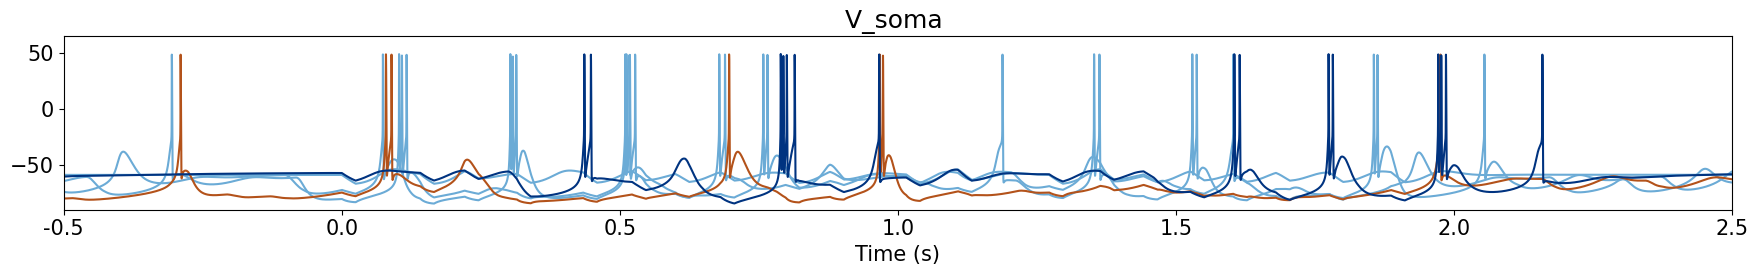

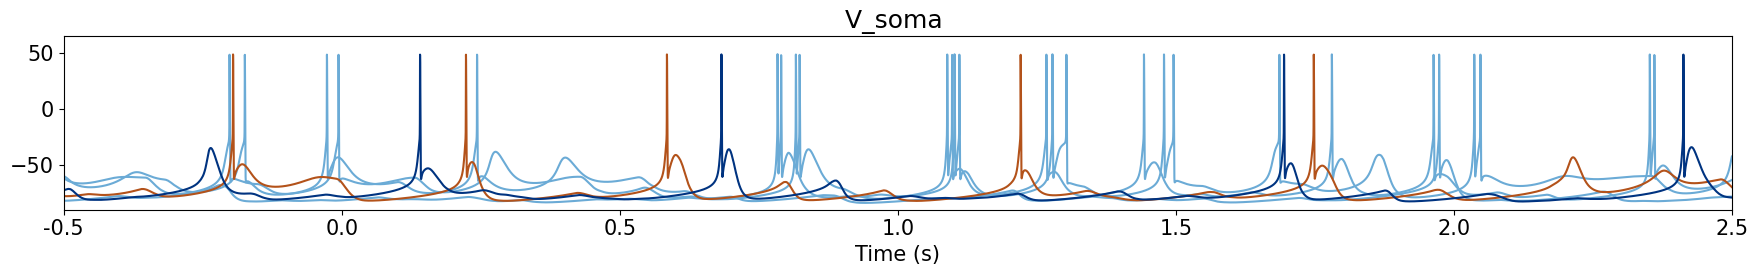

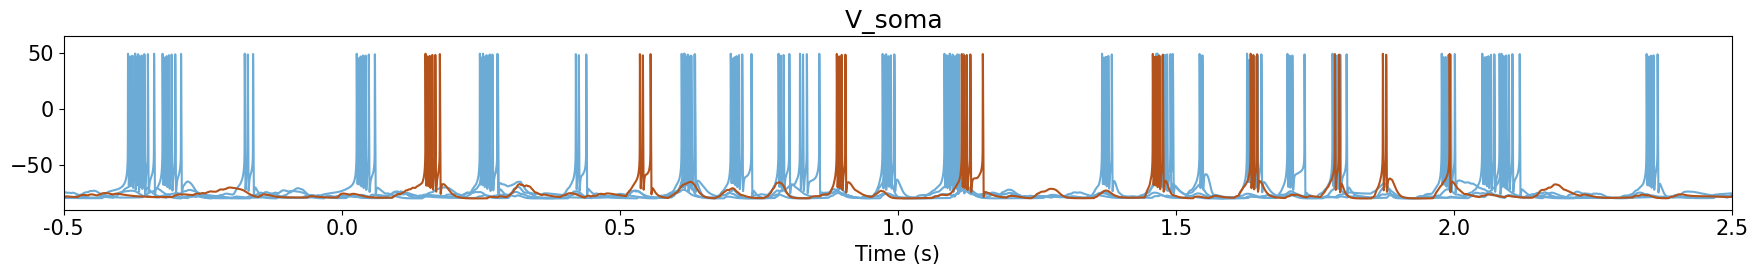

In [42]:
for pop in ['VPM_sTC', 'VPM_TC','ss_RTN_m']:
        sim.analysis.plotTraces(include= [pop], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-90,65], subtitles= True, axis=True, scaleBarLoc=1, 
                            figSize=(18, 3), fontSize=15, showFig=False, saveFig=False);
        plt.xlim(8500,11500)
        plt.xlabel('Time (s)')
        plt.xticks(np.linspace(8500,11500,7),np.linspace(-0.5,2.5,7));

Preparing spike data...
Plotting raster...


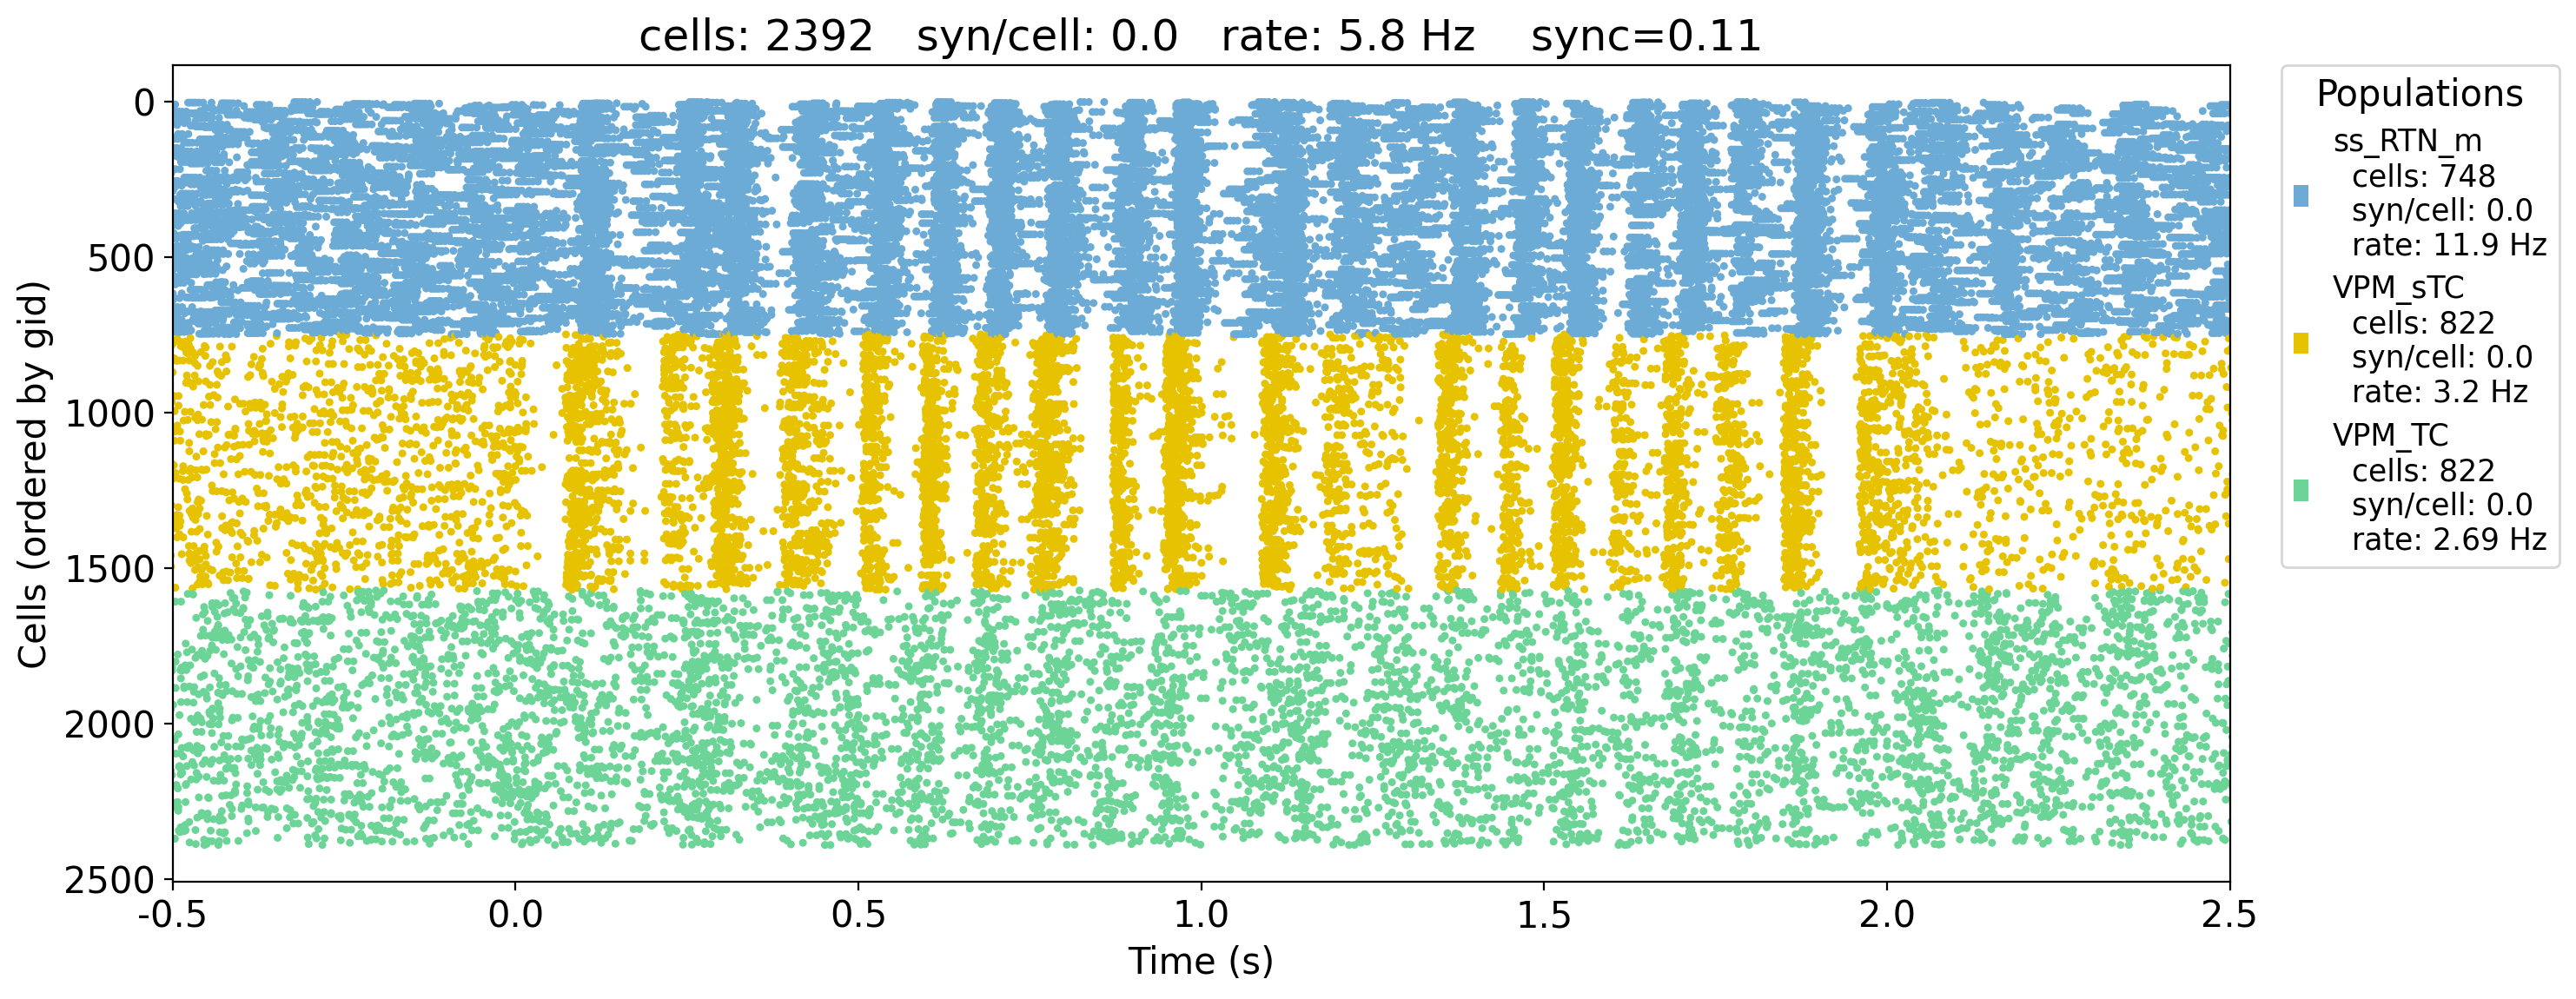

In [43]:
sim.analysis.plotRaster(**{'include': ['VPM_TC','ss_RTN_m','VPM_sTC'], 'saveFig': False, 'showFig': False, 'popRates': True,'orderInverse': True, 
                            'timeRange': timeRange, 'figSize': (15,6), 'fontSize':8, 'lw': 1, 'markerSize':1, 'marker': 'o', 'dpi': 200})
plt.xlim(8500,11500)
plt.xlabel('Time (s)')
plt.xticks(np.linspace(8500,11500,7),np.linspace(-0.5,2.5,7));


Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace


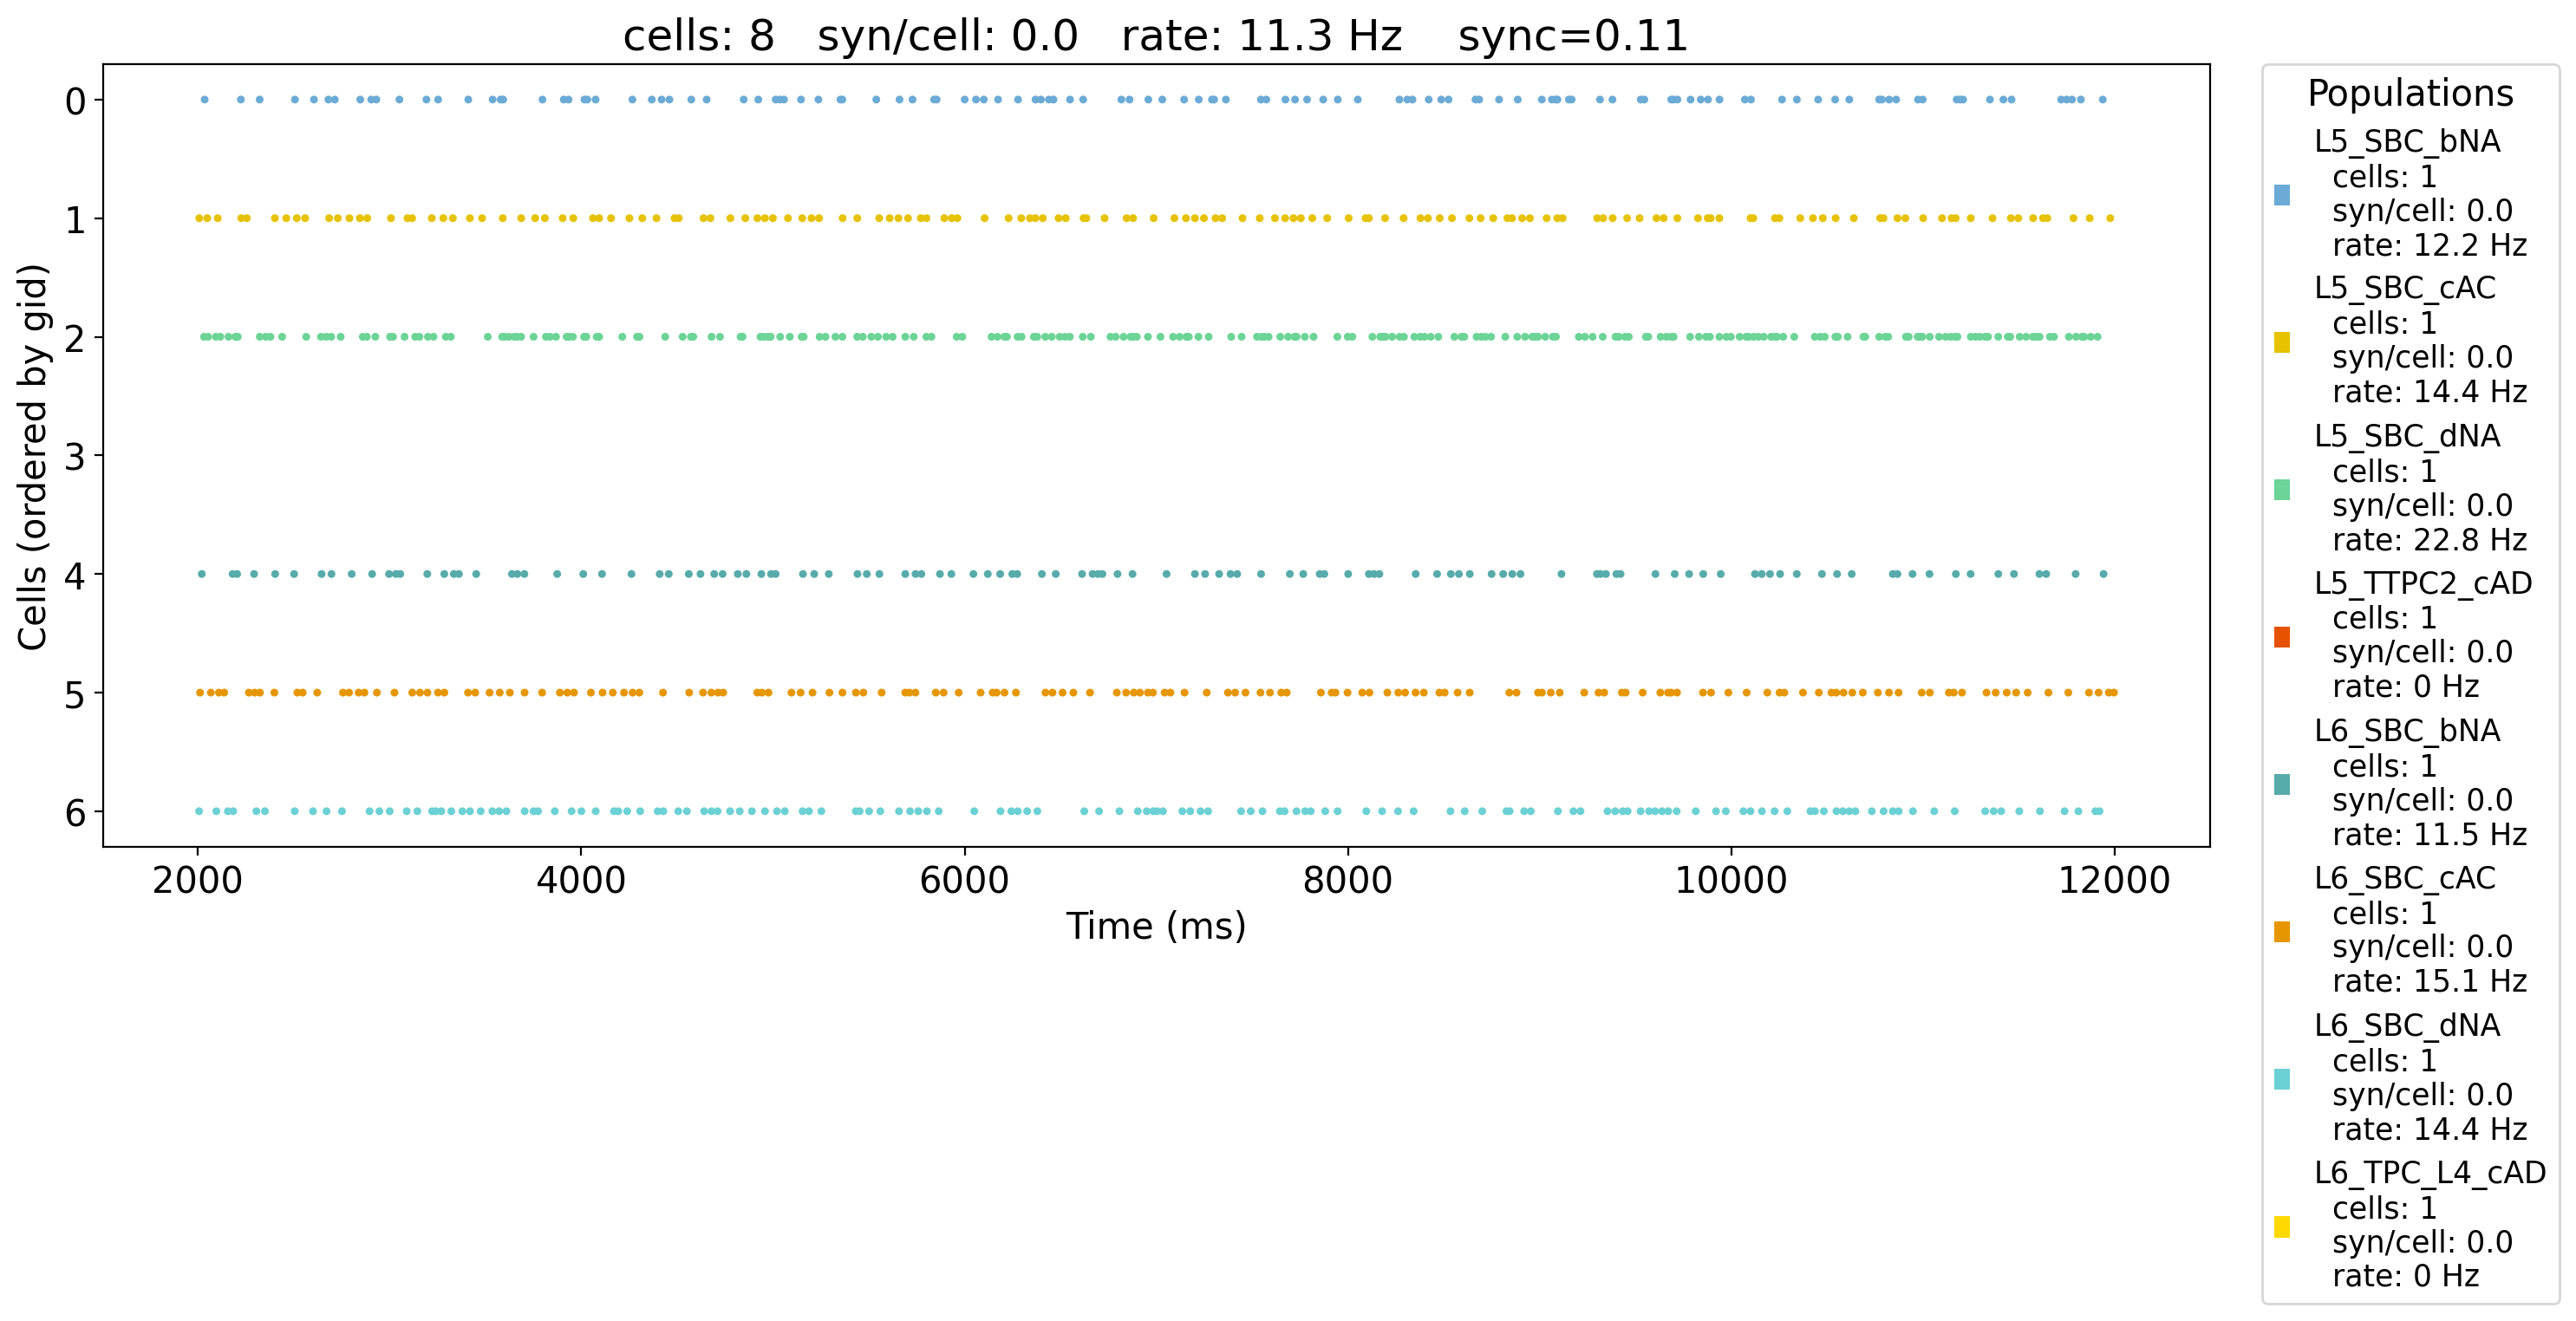

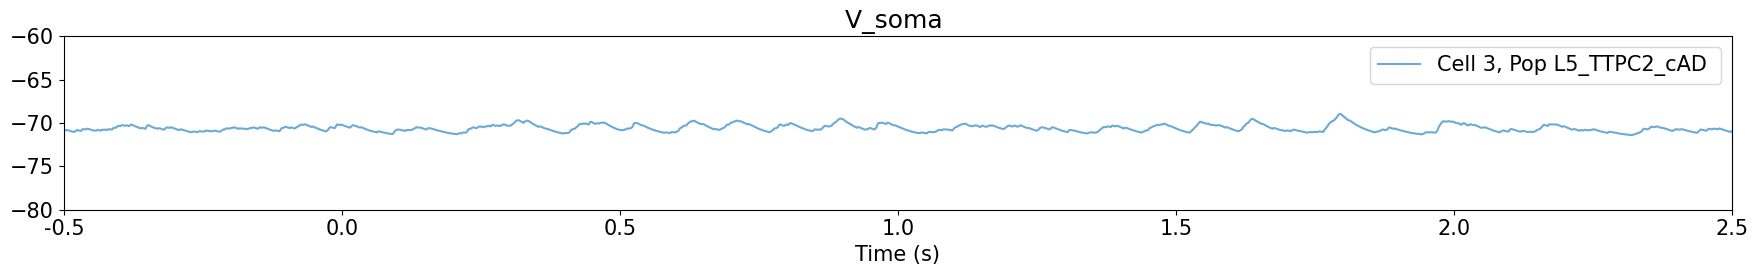

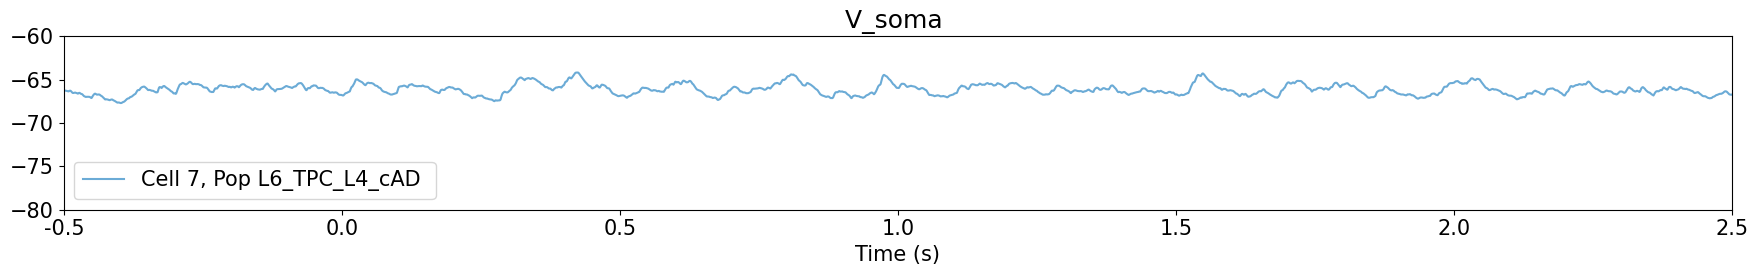

In [50]:
timeRange = [2000,12000]
# 'presyn_VPL_sTC', 'presyn_VPM_sTC', 'presyn_POm_sTC_s1'
sim.analysis.plotRaster(**{'include': sim.cfg.S1cells, 'saveFig': False, 'showFig': False, 'popRates': True,'orderInverse': True, 
                           'timeRange': timeRange, 'figSize': (15,7), 'fontSize':4, 'lw': 1, 'markerSize':1, 'marker': 'o', 'dpi': 200})

for pop in sim.cfg.S1cells:
    if 'TPC' in pop:
        sim.analysis.plotTraces(include= [pop], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-80,-60], subtitles= True, axis=True, scaleBarLoc=1, 
                            figSize=(18, 3), fontSize=15, showFig=False, saveFig=False);
        plt.xlim(8500,11500)
        plt.xlabel('Time (s)')
        plt.xticks(np.linspace(8500,11500,7),np.linspace(-0.5,2.5,7));

Preparing spike data...
Plotting spike frequency...


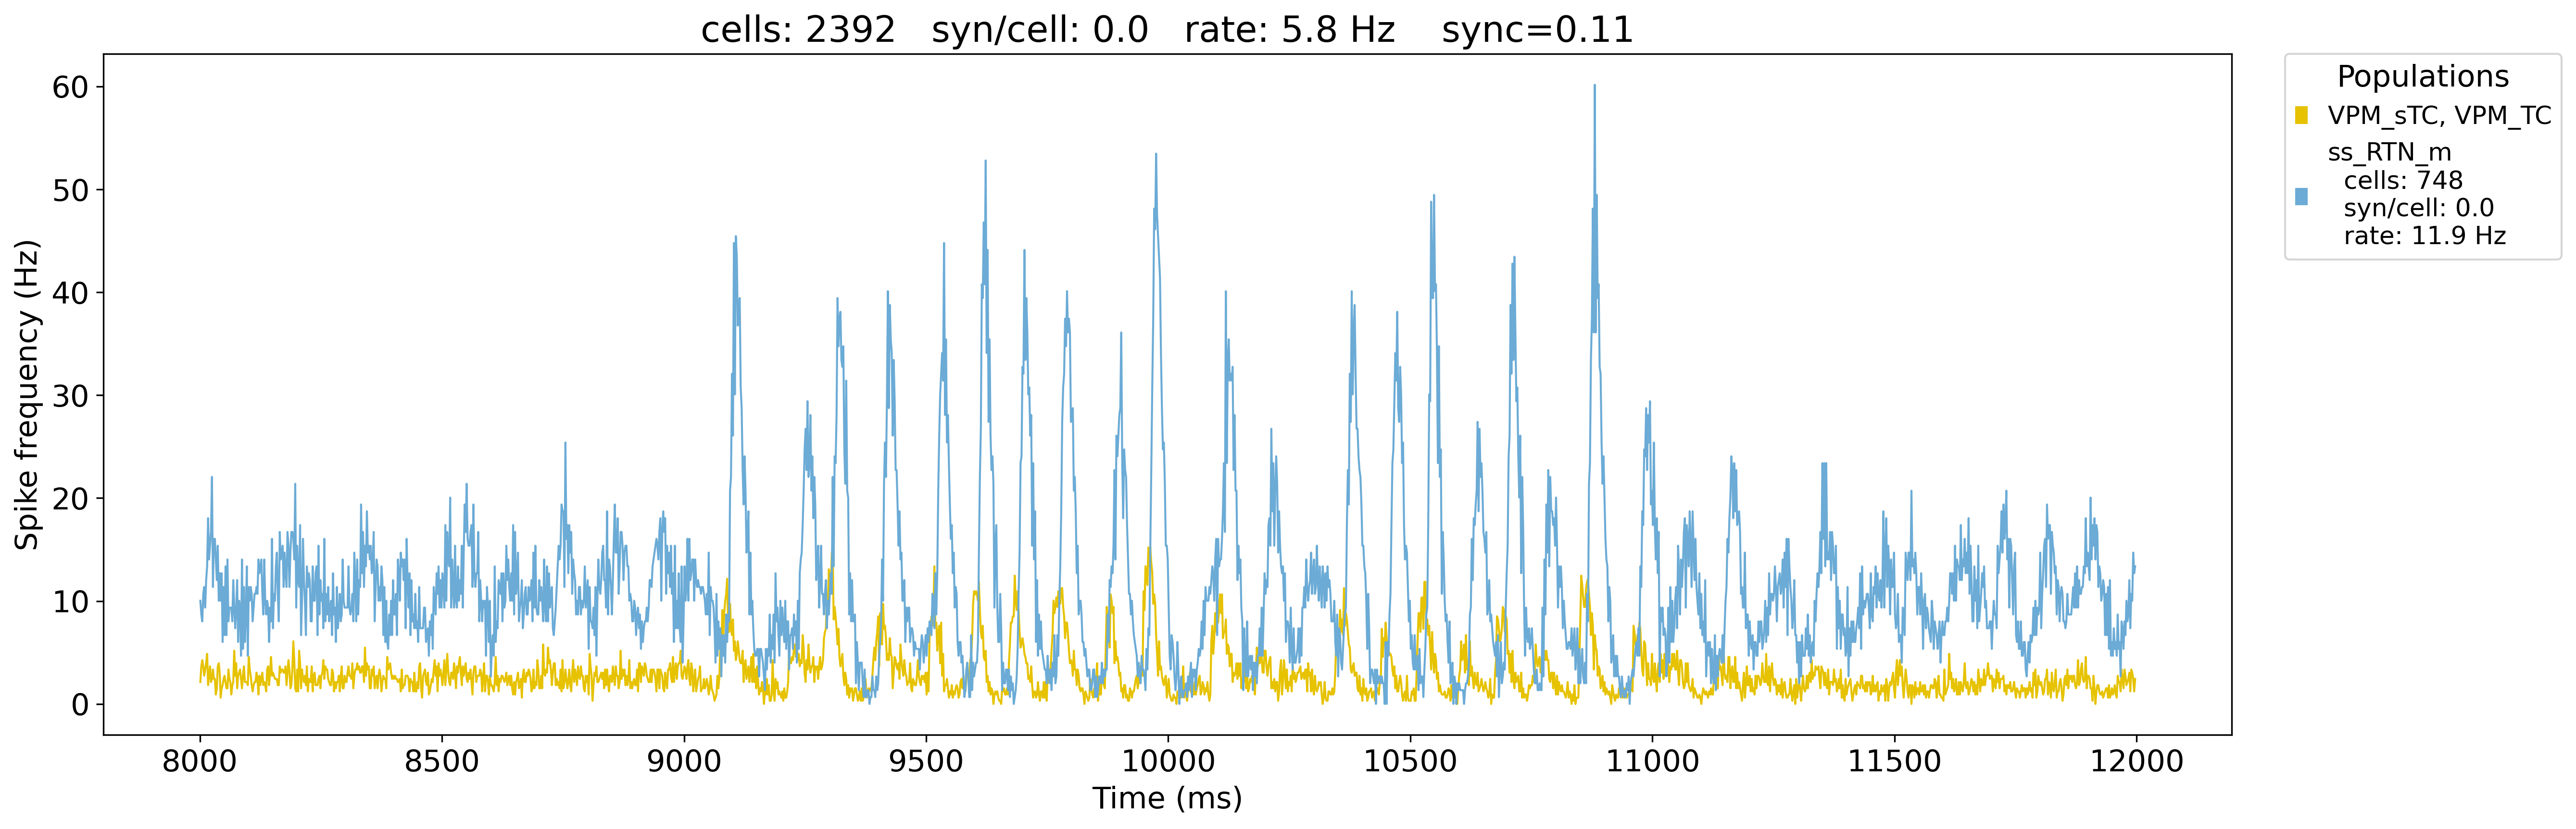

In [46]:
sim.analysis.plotSpikeHist(include=[['VPM_sTC', 'VPM_TC'],'ss_RTN_m'], binSize=2, figSize=(18, 6.0), fontSize = 12, legend=False, showFig= False,
                                    timeRange = timeRange, graphType = 'bar', measure = 'rate', linewidth=5, dpi=300, saveData=False, saveFig=False);